# ANIMATED PLOTS WITH `matplotlib`

## Warming up
In this example we plot a few different functions and include labels and legend.

The colors are assigned automatically. You can also specify the color by using the proper parameter. See `help(plt.plot)` or visit to [matplotlib.pyplot.plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) for details.

Note how plotting a function consists in sampling the $x$ axis in an interval and then plotting the function for each point. The number of samples will determine how smooth the curve will be.

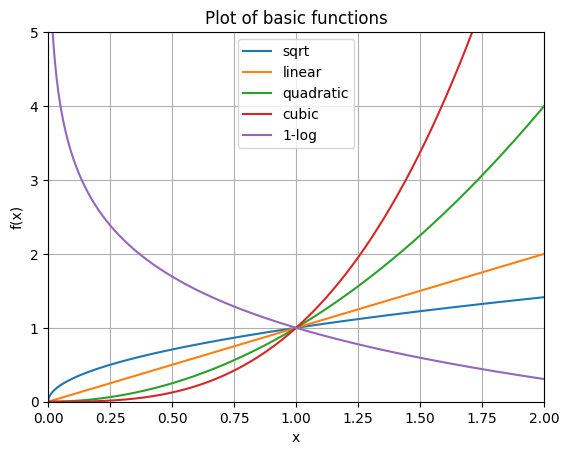

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# See what happens when reducing the number of samples to 10
x = np.linspace(0.001, 2, 100000)

plt.xlabel('x')
plt.ylabel('f(x)')

plt.title("Plot of basic functions")

plt.plot(x, np.sqrt(x), label='sqrt')
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
# See what happens when the following curve is not plotted
plt.plot(x, 1-np.log(x), label='1-log')

plt.xlim(0., 2.)
plt.ylim(0., 5.)
plt.grid(True)
plt.legend()

plt.show()

## Ready to go!
We are finally ready to complete the exercise of the projectile trajectory by animating the plot.

The main difference is that instead of a simple `plt.plot(...)` command, we need to interact with the elements forming a plot. To understand the internals of the plot object take a look at this [matplotlib FAQ](https://matplotlib.org/faq/usage_faq.html).

We use the simple version of the example with all values fixed and focus on the plotting part.

First we load the `animation` module from `matplotlib`.

In [2]:
#%matplotlib inline does not behave well with animate on my machine
#%matplotlib notebook does, but it does not work smoothly with colab...
# To make things work on colab stick to inline, and take the additional steps commented out after plt.show()
%matplotlib notebook

# The ordering of these import can affect the behaviour of the notebook when
# using older Python interpreters.  Place the numpy import first for safety.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# All the rest here should be familiar by now...
g = 9.8 # m/s^2
h = 10. # m
theta = np.deg2rad(30.) # NumPy!
v0 = 30. # m/s
dt = 0.1 # s
x0 = 0   # m
y0 = h   # m

v0x = v0*np.cos(theta)
v0y = v0*np.sin(theta)
print("v0_x: %.1f m/s \t v0_y: %.1f m/s" % (v0x,v0y))

# Evolution function: returns 2 values: x(t), y(t)
def pos(t):
    return x0 + v0x*t, y0 + v0y*t - 0.5*g*t*t

# Generate sampling times as an ndarray
times = np.arange(0., 1000., dt)

# Use 2D array to perform a single comprehension
# Stop when y(t)=pos(t)[1] < 0
trajectory = np.array([pos(t) for t in times if pos(t)[1]>=0.])

v0_x: 26.0 m/s 	 v0_y: 15.0 m/s


To see the data, use **slicing**.  The slices are still `ndarray`s.

To extract all values of the coordinate $x$
- grab all rows with `:`
- grab only column `0`

To extract all values of the coordinate $y$
- grab all rows with `:`
- grab only column `1`

In [3]:
print("Shape of array")
print(trajectory.shape)
print(type(trajectory))

x = trajectory[:,0]
y = trajectory[:,1]
print(type(x), type(y))

Shape of array
(37, 2)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Here is a static version of the plot we want to animate.

Notice that we can pass the $x$ and $y$ NumPy arrays to matplotlib.

<IPython.core.display.Javascript object>


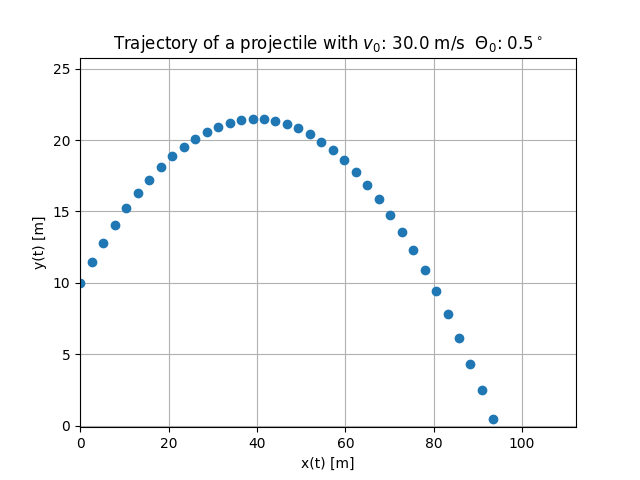

In [4]:
# Create a figure object
fig = plt.figure()

# Add subplot (just 1) and set x and y limits based on data.
# 111 means "1x1 grid, 1st subplot".
# ax is the object containing objects to be plotted.
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.1, max(x)*1.2), ylim=(-0.1,max(y)*1.2))
ax.grid()
ax.set_xlabel("x(t) [m]")
ax.set_ylabel("y(t) [m]")
plt.title("Trajectory of a projectile with $v_0$: %.1f m/s\t $\Theta_0$: %.1f$^\circ$" % (v0,theta))

# Try: '--', 'x', '.', 'o'
ax.plot(x, y, 'o', lw=2)

plt.show()

In this example we have used the `subplot` function. In principle a figure can now contain multiple plots and
`ax.plot()` returns a list of objects, even if it contains only one object ([matplotlib.axes.Axes.plot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.plot.html)).

*Digression*: let's use slicing again to find the max height. In this case it can be a bit confusing if auxiliary variables are not introduced.

Again: note that `index()` is a method for a list not for slices.

In [5]:
# Maximum y
max_y = max(y)
print("Max y: ", max_y)

Max y:  21.475


In [6]:
# Index of the maximum y
i_max_y = list(y).index(max_y) 
print("Index of max y:", i_max_y)

Index of max y: 15


In [7]:
# x of max y is the x value with the same index
max_x = x[i_max_y]
print("x of max y:", max_x)

x of max y: 38.97114317029974


In [8]:
# Print it all together

# Not too easy to read
print("Max height: %.2f at x = %.2f" % (max(y), trajectory[list(y).index(max(y)),0]))

# Better
print("Max height: %.2f at x = %.2f" % (max_y, trajectory[i_max_y, 0]))

Max height: 21.48 at x = 38.97
Max height: 21.48 at x = 38.97


Now we use the [`FuncAnimation`](https://matplotlib.org/api/_as_gen/matplotlib.animation.FuncAnimation.html) to animate the plot. The process consists in 3 steps.
1. Plot the initial state of the plot. In our case we plot the initial positions `x[0]` and `y[0]`.
1. Define a function to call at each frame; it takes an argument and is called to update the info being displayed on the plot.
1. Call the `FuncAnimation` function that updates the figure by calling the function of point 2 a number of times
  - `FuncAnimation` has  a number of useful options such as whether to repeat the animation, change the frame rate, introduce a delay between repetitions, etc.

<IPython.core.display.Javascript object>


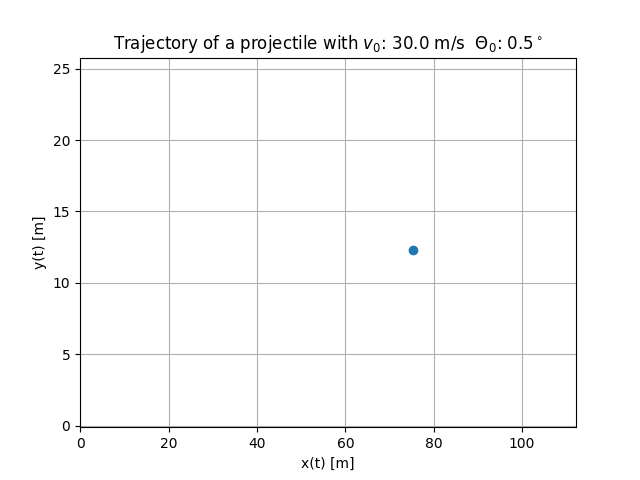

In [9]:
# Create a figure object
fig = plt.figure()

# Add subplot (just 1) and set x and y limits based on data.
# 111 means "1x1 grid, 1st subplot".
# ax is the object containing objects to be plotted.
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.1, max(x)*1.2), ylim=(-0.1,max(y)*1.2))
ax.grid()
ax.set_xlabel('x(t) [m]')
ax.set_ylabel("y(t) [m]")
plt.title("Trajectory of a projectile with $v_0$: %.1f m/s\t $\Theta_0$: %.1f$^\circ$" % (v0,theta))

# 1. Plot the initial state of the plot
line = ax.plot(x[0], y[0], 'o', lw=2)

# 2. Define an "update_plots" function to call at each frame.
# Each call to animate with argument i modifies the line[0] object which is the plot being shown.
# In our case we use i to draw the i-th position.
def update_plots(i):
    # Draw the i-th position
    line[0].set_data(x[i], y[i])
    # Return a tuple
    return line[0],

# 3. Call the FuncAnimation function to redraw the 'fig' object using the 'update_plots' function with argument 
# which is an int given by np.arange(1, len(x))
anim = animation.FuncAnimation(fig, update_plots, np.arange(1, len(x)), interval=50, blit=True, repeat=True)

# With %matplotlib notebook, the following line is enough on my machine
# Here we only get the first frame, so we do something additional in the next cell
plt.show()

In [10]:
# Here is the rendering that makes it work on Colab
#from matplotlib import rc
# Try rc('animation', html='jshtml') if the following line is not succesful
#rc('animation', html='html5')
#anim

### The whole code in a single cell

v0_x: 26.0 m/s 	 v0_y: 15.0 m/s
max height: 21.48 at x = 38.97


<IPython.core.display.Javascript object>


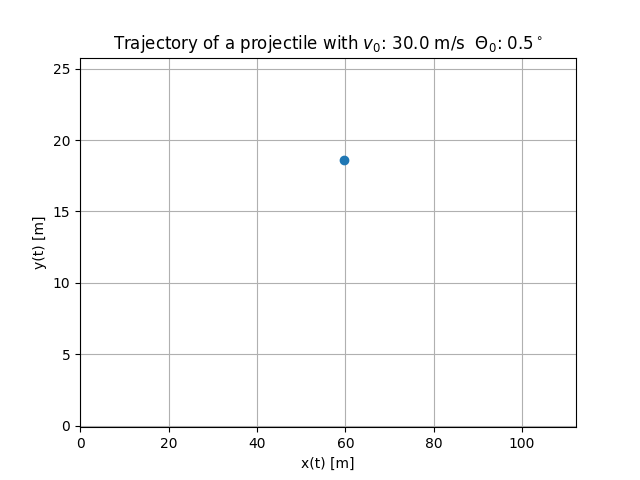

In [13]:
#%matplotlib inline does not behave well with animate on my machine
#%matplotlib notebook does, but it does not work smoothly with colab...
# To make things work on colab stick to inline, and take the additional steps commented out after plt.show()
%matplotlib notebook

# The ordering of these import can affect the behaviour of the notebook when
# using older Python interpreters.  Place the numpy import first for safety.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# All the rest here should be familiar by now...
g = 9.8 # m/s^2
h = 10. # m
theta = np.deg2rad(30.) # NumPy!
v0 = 30. # m/s
dt = 0.1 # s
x0 = 0   # m
y0 = h   # m

v0x = v0*np.cos(theta)
v0y = v0*np.sin(theta)
print("v0_x: %.1f m/s \t v0_y: %.1f m/s"%(v0x,v0y))

# Evolution function: returns 2 values: x(t), y(t)
def pos(t):
    return x0 + v0x*t, y0 + v0y*t - 0.5*g*t*t

# Generate sampling times as an ndarray
times = np.arange(0., 1000., dt)

# Use 2D array to perform a single comprehension
# Stop when y(t)=pos(t)[1] < 0
trajectory = np.array([pos(t) for t in times if pos(t)[1]>=0.])

# Extract x's and y's for convenience
x = trajectory[:,0]
y = trajectory[:,1]

print("max height: %.2f at x = %.2f" % (max(y), x[list(y).index(max(y))]))

# Create a figure object
fig = plt.figure()

# Add subplot (just 1) and set x and y limits based on data
# ax is the object containing objects to be plotted
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.1, max(x)*1.2), ylim=(-0.1,max(y)*1.2))
ax.grid()
ax.set_xlabel('x(t) [m]')
ax.set_ylabel("y(t) [m]")
plt.title("Trajectory of a projectile with $v_0$: %.1f m/s\t $\Theta_0$: %.1f$^\circ$" % (v0,theta))

# 1. Plot the initial state of the plot
line = ax.plot(x[0], y[0], 'o', lw=2)

# 2. Define an "update_plots" function to call at each frame.
# Each call to animate with argument i modifies the line[0] object which is the plot being shown.
# In our case we use i to draw the i-th position.
def update_plots(i):
    # Draw the i-th position
    line[0].set_data(x[i], y[i])
    # Return a tuple
    return line[0],

# 3. Call the FuncAnimation function to redraw the 'fig' object using the 'update_plots' function with argument 
# which is an int given by np.arange(1, len(x))
anim = animation.FuncAnimation(fig, update_plots, np.arange(1, len(x)), interval=50, blit=True, repeat=True)

# With %matplotlib notebook, the following line is enough on my machine
# Here we only get the first frame, so we do something additional in the next cell
plt.show()

# Here is the rendering that makes it work on Colab
#from matplotlib import rc
# Try rc('animation', html='jshtml') if the following line is not succesful
#rc('animation', html='html5')
#anim

If you would like to keep the trajectory in the figure, you simply have to specify to plot all the point up to $i$-th position by using **slicing**. 

Change `x[i]` to `x[:i]` and `y[i]` to `y[:i]` in `update_plots(i)` to see this!

Try out the effect of `x[i:]` and `y[i:]` as well.

## Now let's plot the projectile and the trajectory, and add info to report the time and the position

We do this by defining a template text for what we want to show and its format. The actual data is updated in the animate function `update_plots` as with the positions.

v0_x: 26.0 m/s 	 v0_y: 15.0 m/s
max height: 21.48 at x = 38.97


<IPython.core.display.Javascript object>


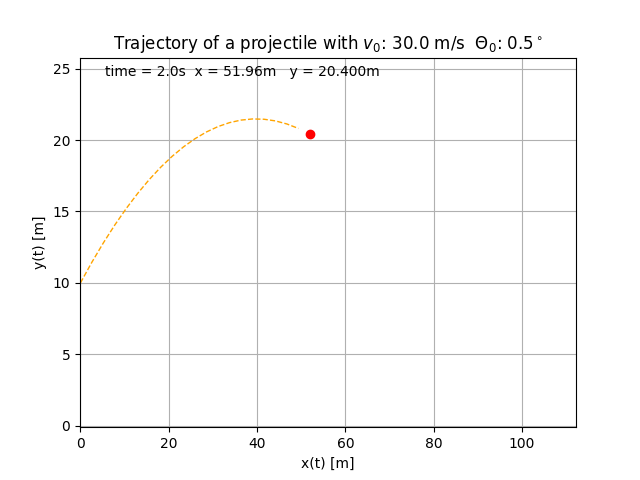

In [14]:
#%matplotlib inline does not behave well with animate on my machine
#%matplotlib notebook does, but it does not work smoothly with colab...
# To make things work on colab stick to inline, and take the additional steps commented out after plt.show()
%matplotlib notebook

# The ordering of these import can affect the behaviour of the notebook when
# using older Python interpreters.  Place the numpy import first for safety.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# All the rest here should be familiar by now...
g = 9.8 # m/s^2
h = 10. # m
theta = np.deg2rad(30.) # NumPy!
v0 = 30. # m/s
dt = 0.1 # s
x0 = 0   # m
y0 = h   # m

v0x = v0*np.cos(theta)
v0y = v0*np.sin(theta)
print("v0_x: %.1f m/s \t v0_y: %.1f m/s"%(v0x,v0y))

# Evolution function: returns 2 values: x(t), y(t)
def pos(t):
    return x0 + v0x*t, y0 + v0y*t - 0.5*g*t*t

# Generate sampling times as an ndarray
times = np.arange(0., 1000., dt)

# Use 2D array to perform a single comprehension
# Stop when y(t)=pos(t)[1] < 0
trajectory = np.array([pos(t) for t in times if pos(t)[1]>=0.])

# Extract x's and y's for convenience
x = trajectory[:,0]
y = trajectory[:,1]

print("max height: %.2f at x = %.2f" % (max(y), x[list(y).index(max(y))]))

# Create a figure object
fig = plt.figure()

# Add subplot (just 1) and set x and y limits based on data
# ax is the object containing objects to be plotted
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.1, max(x)*1.2), ylim=(-0.1,max(y)*1.2))
ax.grid()
ax.set_xlabel("x(t) [m]")
ax.set_ylabel("y(t) [m]")
plt.title("Trajectory of a projectile with $v_0$: %.1f m/s\t $\Theta_0$: %.1f$^\circ$" % (v0,theta))

# 1. Plot the initial state of the plot...
line = ax.plot(x[0], y[0], '--', lw=1, color='orange')
ball = ax.plot([], [], 'o-', lw=2, color='red')
# ...including a template info box to be shown
info_template = 'time = %.1fs  x = %.2fm   y = %.3fm'
info_text = ax.text(0.05, 0.95, '', transform=ax.transAxes)

In [15]:
# line is a list of objects (initially there is no line to show, with just one point)
print(type(line))
print(line)
print(len(line))

# ball is also a list of objects (initially there is no ball to show: ball was called with arguments [], [])
print(type(ball))
print(ball)
print(len(ball))

<class 'list'>
1
<class 'list'>
1


We can use the `_` variable to use just the object contained in the list

In [16]:
# 1. Plot the initial state of the plot
line, *_ = ax.plot(x[0], y[0], '--', lw=1, color='orange')
ball, *_ = ax.plot([], [], 'o-', lw=2, color='red')

In [17]:
# line is now that first object in the list we had previously called line
print(type(line))
print(line)

# ball is now that first object in the list we had previously called ball
print(type(ball))
print(ball)

<class 'matplotlib.lines.Line2D'>
Line2D(_child3)
<class 'matplotlib.lines.Line2D'>
Line2D(_child4)


Now we can define the function that can be called a number of times to update what needs to be shown

In [18]:
# Define the 'update_plots' function to animate the frames
# At each step we do 3 things
# 1) draw the line from 0 -> i-th position
# 2) draw the point at i-th position
# 3) update the text box with the time and position at i-th position

def update_plots(i):
    line.set_data(x[:i], y[:i])
    ball.set_data(x[i], y[i])
    # Provide the numerical data to info_template to form an actual string
    info_text.set_text(info_template % (times[i], x[i], y[i]))
    # Return a tuple
    return line, ball, info_text

# 3. Call the FuncAnimation function to redraw the 'fig' object using the 'update_plots' function with argument 
# which is an int given by np.arange(1, len(x))
anim = animation.FuncAnimation(fig, update_plots, np.arange(1, len(x)), interval=50, blit=True, repeat=True)

# With %matplotlib notebook, the following line is enough on my machine
# Here we only get the first frame, so we do something additional in the next cell
plt.show()

# Here is the rendering that makes it work on Colab
#from matplotlib import rc
# Try rc('animation', html='jshtml') if the following line is not succesful
#rc('animation', html='html5')
#anim

## Exercises you can practice with
- Write position *x* of the max height and put an arrow pointing to the apex
- Write the value of *x* and *y* on the plot near the actual position in real time
- Add a slider to modify the value of some parameters interactively
- Create an animated histogram for a Gaussian distribution
- Extend the problem to 3D and use 3D plot to show the trajectory in space using [mplot3d](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)

## Additional material
- Take a look at this very nice example of the animation of a [double pendulum](https://matplotlib.org/gallery/animation/double_pendulum_sgskip.html)